In [1]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics, preprocessing, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras import optimizers, layers, regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint

#data = pd.read_csv('Iris.csv')
data = pd.read_csv('redWine.csv')
#data = pd.read_csv('heart.csv')

C:\Users\nicho\Anaconda3\envs\mlgpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
#tmp = data.drop('Id', axis = 1)
#g = sns.pairplot(tmp, hue='quality', markers='+')
#plt.show()

#g = sns.violinplot(y='quality', x='alcohol', data=data, inner='quartile')
#plt.show()
#g = sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
#plt.show()
#g = sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
#plt.show()
#g = sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
#plt.show()

In [2]:
X = data.drop(['quality'], axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)

[0.54375, 0.49375, 0.5125, 0.50625, 0.51875, 0.55625, 0.50625, 0.53125, 0.5125, 0.51875, 0.5125, 0.50625, 0.48125, 0.48125, 0.49375, 0.5, 0.525, 0.525, 0.53125, 0.53125, 0.56875, 0.56875, 0.58125, 0.58125, 0.55, 0.56875, 0.5625, 0.58125, 0.5625, 0.575, 0.55, 0.575, 0.55, 0.58125, 0.5625, 0.56875, 0.5625, 0.56875, 0.53125, 0.5625, 0.5375, 0.54375, 0.54375, 0.53125, 0.54375, 0.525, 0.55625, 0.53125, 0.525, 0.53125]


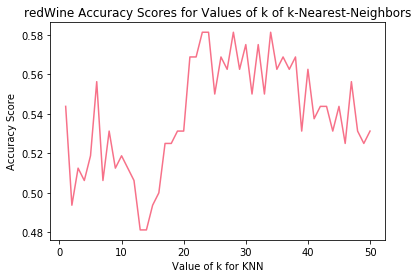

In [8]:
# K-NEAREST NEIGHBOR
k_range = list(range(1,51))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('redWine Accuracy Scores for Values of k of k-Nearest-Neighbors')
#plt.show()
plt.savefig('wineknn.png')
print(scores)


training time:  0.003000497817993164 

prediction time:  0.006000995635986328 



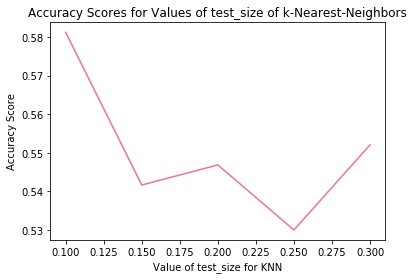

In [9]:
test_range = [.30, .25, .20, .15, .10]
scores = []
for test in test_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=6)
    knn = KNeighborsClassifier(n_neighbors=28)
    t1 = time.time()
    knn.fit(X_train, y_train)
    t2 = time.time()
    y_pred = knn.predict(X_test)
    t3 = time.time()
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(test_range, scores)
plt.xlabel('Value of test_size for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of test_size of k-Nearest-Neighbors')
plt.savefig('wineknnlearning')
print("training time: ", t2-t1, "\n")
print("prediction time: ", t3-t2, "\n")

In [9]:
# SUPPORT VECTOR MACHINE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=6)
clf = SVC(kernel='linear')
t1 = time.time()
clf.fit(X_train,y_train)
t2 = time.time()
y_pred = clf.predict(X_test)
t3 = time.time()
print(accuracy_score(y_test,y_pred))
print("training time: ", t2-t1, "\n")
print("prediction time: ", t3-t2, "\n")

0.55
training time:  10.253077268600464 

prediction time:  0.002000570297241211 



In [10]:
clf = SVC(kernel='rbf', gamma='auto')
t1 = time.time()
clf.fit(X_train,y_train)
t2 = time.time()
y_pred = clf.predict(X_test)
t3 = time.time()
print(accuracy_score(y_test,y_pred))
print("training time: ", t2-t1, "\n")
print("prediction time: ", t3-t2, "\n")

0.56875
training time:  0.09355378150939941 

prediction time:  0.004999637603759766 



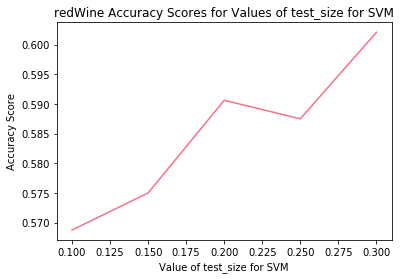

In [12]:
test_range = [.30, .25, .20, .15, .10]
scores = []
for test in test_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=6)
    clf = SVC(kernel='rbf', gamma='auto')
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(test_range, scores)
plt.xlabel('Value of test_size for SVM')
plt.ylabel('Accuracy Score')
plt.title('redWine Accuracy Scores for Values of test_size for SVM')
plt.savefig('winesvm.png')

[58.96, 56.25, 62.81, 59.17, 67.5]


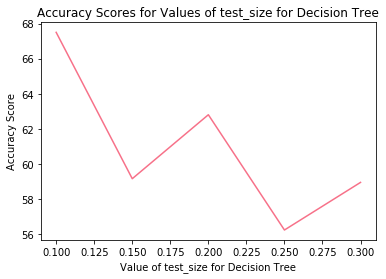

In [13]:
# DECISION TREES WITH PRUNING
test_range = [.30, .25, .20, .15, .10]
scores = []
for test in test_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=6)
    decision_tree = DecisionTreeClassifier(random_state=0)
    decision_tree.fit(X_train, y_train)
    #acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
    #print(acc_decision_tree)
    acc_test_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
    scores.append(acc_test_decision_tree)
plt.plot(test_range, scores)
plt.xlabel('Value of test_size for Decision Tree')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of test_size for Decision Tree') 
plt.savefig('winedttest')
print(scores)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=6)
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(len(ccp_alphas))

216


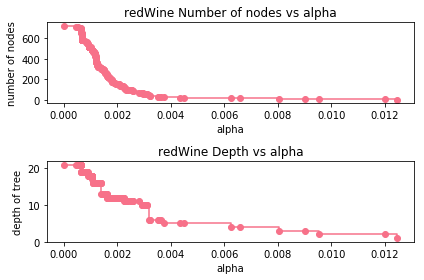

In [16]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("redWine Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("redWine Depth vs alpha")
fig.tight_layout()

new max accuracy with pruning:  0.6875


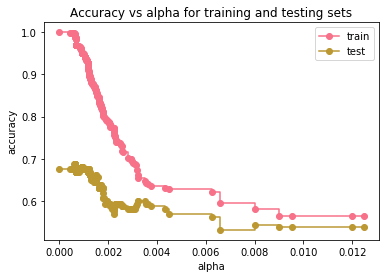

In [17]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.savefig('winepruning')
print("new max accuracy with pruning: ",max(test_scores))

[58.13, 59.0, 56.56, 56.67, 56.25]


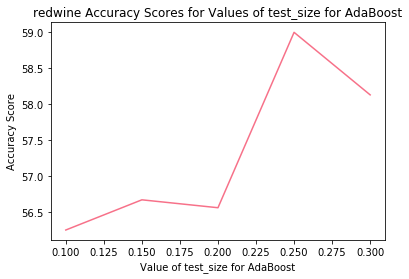

In [20]:
# ADABOOST
test_range = [.30, .25, .20, .15, .10]
scores = []
for test in test_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=6)
    clf = AdaBoostClassifier(algorithm='SAMME.R', n_estimators=100, random_state=0, learning_rate=0.05, 
                             base_estimator=None)
    clf.fit(X_train, y_train)
    #acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
    #print(acc_decision_tree)
    acc_test_boosting = round(clf.score(X_test, y_test) * 100, 2)
    scores.append(acc_test_boosting)
plt.plot(test_range, scores)
plt.xlabel('Value of test_size for AdaBoost')
plt.ylabel('Accuracy Score')
plt.title('redwine Accuracy Scores for Values of test_size for AdaBoost') 
plt.savefig('wineboosttest')
print(scores)

[0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.06999999999999999, 0.08, 0.09, 0.09999999999999999, 0.11, 0.12, 0.13, 0.14, 0.15000000000000002, 0.16, 0.17, 0.18000000000000002, 0.19, 0.2]
[57.75, 58.0, 58.5, 58.75, 59.0, 58.0, 59.5, 57.5, 58.75, 57.5, 57.75, 57.75, 56.75, 55.25, 55.25, 55.5, 54.75, 55.5, 55.5, 56.0]


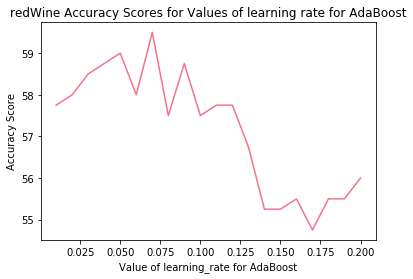

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)
learning_range = list(np.linspace(0.01, 0.2, num=20))
scores = []
for rate in learning_range:
    clf = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=rate)
    clf.fit(X_train, y_train)
    acc_test_boosting = round(clf.score(X_test, y_test) * 100, 2)
    scores.append(acc_test_boosting)
plt.plot(learning_range, scores)
plt.xlabel('Value of learning_rate for AdaBoost')
plt.ylabel('Accuracy Score')
plt.title('redWine Accuracy Scores for Values of learning rate for AdaBoost') 
plt.savefig('wineboostlearning')
print(learning_range)
print(scores)

In [3]:
# NEURAL NETWORK
nndata = pd.read_csv("redWine.csv")
nndata["quality"] =nndata["quality"].astype(int)
nndata = pd.get_dummies(nndata, columns=["quality"])
X = nndata.iloc[:,0:11].values # first columns
Y = nndata.iloc[:,12:].values # last columns
X = preprocessing.normalize(X, axis = 0)
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.2, random_state=6)
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(1279, 11) (1279, 5) (320, 11) (320, 5)


In [4]:
def build_ann(optimizer='adam'):
    
    # Initializing the ANN
    ann = Sequential()
    
    # layer 1
    ann.add(Dense(30, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_dim=11))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    # layer 2
    ann.add(Dense(50, name='fc1',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('tanh'))
    ann.add(Dropout(0.5))
    # layer 3
    ann.add(Dense(100, name='fc2',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('relu'))
    ann.add(Dropout(0.5))
    # layer 4
    ann.add(Dense(5, name='fc3',bias_initializer='zeros'))
    ann.add(BatchNormalization(momentum=0.99, epsilon=0.001))
    ann.add(Activation('softmax'))
    
    # Compiling the ANN
    ann.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])
    
    return ann

opt = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
ann = build_ann(opt)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [5]:
history = ann.fit(x = X_train, y = Y_train, epochs = 200,verbose=1, batch_size = 64,validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1279 samples, validate on 320 samples
Epoch 1/200
1279/1279 [==============================] - 2s 1ms/step - loss: 2.0313 - categorical_accuracy: 0.2353 - val_loss: 1.6769 - val_categorical_accuracy: 0.2812
Epoch 2/200
1279/1279 [==============================] - 0s 120us/step - loss: 2.0135 - categorical_accuracy: 0.2346 - val_loss: 1.6400 - val_categorical_accuracy: 0.3563
Epoch 3/200
1279/1279 [==============================] - 0s 116us/step - loss: 1.9874 - categorical_accuracy: 0.2408 - val_loss: 1.6392 - val_categorical_accuracy: 0.3594
Epoch 4/200
1279/1279 [==============================] - 0s 115us/step - loss: 1.9709 - categorical_accuracy: 0.2463 - val_loss: 1.6283 - val_categorical_accuracy: 0.3688
Epoch 5/200
1279/1279 [==============================] - 0s 120us/step - loss: 1.9393 - categorical_accuracy: 0.2565 - val_loss: 1.6028 - val_categorical_accuracy: 0.3937
Epoch 

1279/1279 [==============================] - 0s 120us/step - loss: 1.5923 - categorical_accuracy: 0.4175 - val_loss: 1.4404 - val_categorical_accuracy: 0.5281
Epoch 47/200
1279/1279 [==============================] - 0s 116us/step - loss: 1.5747 - categorical_accuracy: 0.4128 - val_loss: 1.4389 - val_categorical_accuracy: 0.5406
Epoch 48/200
1279/1279 [==============================] - 0s 117us/step - loss: 1.5677 - categorical_accuracy: 0.4308 - val_loss: 1.4429 - val_categorical_accuracy: 0.5312
Epoch 49/200
1279/1279 [==============================] - 0s 118us/step - loss: 1.5785 - categorical_accuracy: 0.4034 - val_loss: 1.4443 - val_categorical_accuracy: 0.5375
Epoch 50/200
1279/1279 [==============================] - 0s 122us/step - loss: 1.5777 - categorical_accuracy: 0.4081 - val_loss: 1.4427 - val_categorical_accuracy: 0.5406
Epoch 51/200
1279/1279 [==============================] - 0s 120us/step - loss: 1.5790 - categorical_accuracy: 0.4120 - val_loss: 1.4360 - val_categorica

Epoch 94/200
1279/1279 [==============================] - 0s 120us/step - loss: 1.4084 - categorical_accuracy: 0.5324 - val_loss: 1.3255 - val_categorical_accuracy: 0.5469
Epoch 95/200
1279/1279 [==============================] - 0s 117us/step - loss: 1.4203 - categorical_accuracy: 0.5215 - val_loss: 1.3305 - val_categorical_accuracy: 0.5500
Epoch 96/200
1279/1279 [==============================] - 0s 120us/step - loss: 1.3982 - categorical_accuracy: 0.5450 - val_loss: 1.3347 - val_categorical_accuracy: 0.5563
Epoch 97/200
1279/1279 [==============================] - 0s 118us/step - loss: 1.4259 - categorical_accuracy: 0.5129 - val_loss: 1.3326 - val_categorical_accuracy: 0.5687
Epoch 98/200
1279/1279 [==============================] - 0s 118us/step - loss: 1.4199 - categorical_accuracy: 0.5184 - val_loss: 1.3308 - val_categorical_accuracy: 0.5719
Epoch 99/200
1279/1279 [==============================] - 0s 120us/step - loss: 1.4089 - categorical_accuracy: 0.5285 - val_loss: 1.3306 - v

1279/1279 [==============================] - 0s 126us/step - loss: 1.3160 - categorical_accuracy: 0.5543 - val_loss: 1.2752 - val_categorical_accuracy: 0.5750
Epoch 142/200
1279/1279 [==============================] - 0s 120us/step - loss: 1.3072 - categorical_accuracy: 0.5700 - val_loss: 1.2761 - val_categorical_accuracy: 0.5750
Epoch 143/200
1279/1279 [==============================] - 0s 123us/step - loss: 1.3181 - categorical_accuracy: 0.5653 - val_loss: 1.2634 - val_categorical_accuracy: 0.5719
Epoch 144/200
1279/1279 [==============================] - 0s 122us/step - loss: 1.3251 - categorical_accuracy: 0.5582 - val_loss: 1.2571 - val_categorical_accuracy: 0.5781
Epoch 145/200
1279/1279 [==============================] - 0s 119us/step - loss: 1.3153 - categorical_accuracy: 0.5762 - val_loss: 1.2522 - val_categorical_accuracy: 0.5781
Epoch 146/200
1279/1279 [==============================] - 0s 116us/step - loss: 1.3180 - categorical_accuracy: 0.5528 - val_loss: 1.2497 - val_categ

1279/1279 [==============================] - 0s 118us/step - loss: 1.2623 - categorical_accuracy: 0.5668 - val_loss: 1.2004 - val_categorical_accuracy: 0.5813
Epoch 189/200
1279/1279 [==============================] - 0s 118us/step - loss: 1.2405 - categorical_accuracy: 0.5700 - val_loss: 1.1951 - val_categorical_accuracy: 0.5844
Epoch 190/200
1279/1279 [==============================] - 0s 120us/step - loss: 1.2423 - categorical_accuracy: 0.5684 - val_loss: 1.1822 - val_categorical_accuracy: 0.6031
Epoch 191/200
1279/1279 [==============================] - 0s 118us/step - loss: 1.2385 - categorical_accuracy: 0.5919 - val_loss: 1.1923 - val_categorical_accuracy: 0.5844
Epoch 192/200
1279/1279 [==============================] - 0s 120us/step - loss: 1.2396 - categorical_accuracy: 0.5848 - val_loss: 1.1926 - val_categorical_accuracy: 0.5813
Epoch 193/200
1279/1279 [==============================] - 0s 124us/step - loss: 1.2412 - categorical_accuracy: 0.5864 - val_loss: 1.1803 - val_categ

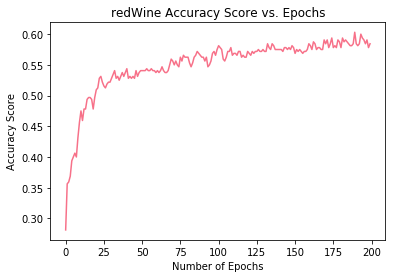

In [6]:
plt.plot(history.history['val_categorical_accuracy'])
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.title('redWine Accuracy Score vs. Epochs') 
#plt.show()
plt.savefig('wineNN.png')